In [1]:
from minio import Minio
from minio.error import S3Error
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pyspark.sql import SparkSession
#import pyspark.errors
from pyspark.sql.functions import col, max
from delta import *

# Stop the existing SparkContext if it exists
try:
    sc.stop()
except NameError:
    pass


builder = SparkSession.builder.appName("Delta With MinIO") \
    .config("spark.hadoop.fs.s3a.endpoint", "http://minio:9000") \
    .config("spark.hadoop.fs.s3a.access.key", "minioadmin") \
    .config("spark.hadoop.fs.s3a.secret.key", "minioadmin") \
    .config("spark.hadoop.fs.s3a.path.style.access", True) \
    .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
    .config("spark.hadoop.fs.s3a.aws.credentials.provider", "org.apache.hadoop.fs.s3a.SimpleAWSCredentialsProvider") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")

spark = configure_spark_with_delta_pip(builder).getOrCreate()

In [3]:
from pyspark.sql import SparkSession

# Set your MinIO configurations
minio_access_key = 'minioadmin'
minio_secret_key = 'minioadmin'
minio_endpoint = 'http://minio:9000'  # Example: 'play.min.io'
minio_bucket = 'ecommerce'

# Set the configurations for accessing MinIO
spark._jsc.hadoopConfiguration().set("fs.s3a.access.key", minio_access_key)
spark._jsc.hadoopConfiguration().set("fs.s3a.secret.key", minio_secret_key)
spark._jsc.hadoopConfiguration().set("fs.s3a.endpoint", minio_endpoint)
spark._jsc.hadoopConfiguration().set("fs.s3a.path.style.access", "true")


In [4]:
# Load file from MinIO bucket
minio_file_path_jan = '2020-Jan.csv'
minio_file_url_jan = f"s3a://{minio_bucket}/{minio_file_path_jan}"
df_jan = spark.read.csv(minio_file_url_jan, header=True)

# Show the loaded DataFrame
df_jan.show()

+--------------------+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|  brand|  price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+
|2020-01-01 00:00:...|      view|   1005073|2232732093077520756|construction.tool...|samsung|1130.02|519698804|69b5d72f-fd6e-4fe...|
|2020-01-01 00:00:...|      view|   1005192|2232732093077520756|construction.tool...|  meizu| 205.67|527767423|7f596032-ccbf-464...|
|2020-01-01 00:00:...|      view| 100063693|2053013552427434207|       apparel.shirt| turtle| 136.43|519046195|d1e2f343-84bb-49b...|
|2020-01-01 00:00:...|      view|   5100816|2232732103831716449|       apparel.shoes| xiaomi|  29.95|518269232|0444841c-38ef-410...|
|2020-01-01 00:00:...|      view| 100014325|2232732103294845523|appar

In [5]:
# Load file from MinIO bucket
minio_file_path_feb = '2020-Feb.csv'
minio_file_url_feb = f"s3a://{minio_bucket}/{minio_file_path_feb}"
df_feb = spark.read.csv(minio_file_url_feb, header=True)

# Show the loaded DataFrame
df_feb.show()

+--------------------+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|  brand|  price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+-------+-------+---------+--------------------+
|2020-02-01 00:00:...|      view| 100010426|2232732115290555244|       apparel.shoes|   null|  19.31|581521975|82d5664d-7980-43e...|
|2020-02-01 00:00:...|      view| 100071077|2232732079706079299|       sport.bicycle|  crown|  11.88|596313635|3df590c0-e667-4f5...|
|2020-02-01 00:00:...|      view|   1004665|2232732093077520756|construction.tool...|samsung| 838.23|608821035|3e271f43-db51-46b...|
|2020-02-01 00:00:...|      view|   1002544|2232732093077520756|construction.tool...|  apple| 410.42|530488542|21f46782-fb36-4d5...|
|2020-02-01 00:00:...|      view| 100010151|2053013563835941749|appli

In [6]:
# Load file from MinIO bucket
minio_file_path_mar = '2020-Mar.csv'
minio_file_url_mar = f"s3a://{minio_bucket}/{minio_file_path_mar}"
df_mar = spark.read.csv(minio_file_url_mar, header=True)

# Show the loaded DataFrame
df_mar.show()

+--------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|2020-03-01 00:00:...|      view|  10900348|2232732105912091273|appliances.kitche...| kitfort| 117.63|550295099|23f5ab9e-7774-416...|
|2020-03-01 00:00:...|      view|  14300020|2232732107967300275|   apparel.underwear|   casio| 264.37|622070532|edf19213-f0dd-46e...|
|2020-03-01 00:00:...|      view|  13200063|2232732061804790604|furniture.bedroom...|    null| 126.10|552832344|608087d8-6b69-21d...|
|2020-03-01 00:00:...|      view| 100077498|2232732085846540487|construction.tool...|  tamina| 424.72|613391860|5ab6c3d5-edd7-4e1...|
|2020-03-01 00:00:...|      view|   1005014|223273209307752075

In [7]:
# Load file from MinIO bucket
minio_file_path_apr = '2020-Apr.csv'
minio_file_url_apr = f"s3a://{minio_bucket}/{minio_file_path_apr}"
df_apr = spark.read.csv(minio_file_url_apr, header=True)

# Show the loaded DataFrame
df_apr.show()

+--------------------+----------+----------+-------------------+--------------------+---------+-------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|    brand|  price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+---------+-------+---------+--------------------+
|2020-04-01 00:00:...|      view|   1201465|2232732101407408685|apparel.shoes.sli...|  samsung| 230.38|568984877|e2456cef-2d4f-42b...|
|2020-04-01 00:00:...|      view|   1307156|2053013554658804075|electronics.audio...|    apple|1352.67|514955500|38f43134-de83-471...|
|2020-04-01 00:00:...|      view|   1480477|2053013563835941749|appliances.kitche...|    apple|1184.05|633645770|16aba270-b3c2-4b2...|
|2020-04-01 00:00:...|      view|   1307050|2053013554658804075|electronics.audio...|    apple|1724.34|564933778|05b443bd-e68a-4d7...|
|2020-04-01 00:00:...|      view|   9500109|22327321041

# CLEAN THE DATA

## REMOVE UNWANTED DATA

we decided to remove the view from the column event_type because the data is very large and we don't need them for answering our business questions

In [8]:
from pyspark.sql.functions import col

# Assuming 'event_type' is a column in the DataFrames df_jan, df_feb, df_mar, and df_apr

# Filtering rows where 'event_type' column is not equal to 'view' for each DataFrame
df_jan = df_jan.filter(col('event_type') != 'view')
df_feb = df_feb.filter(col('event_type') != 'view')
df_mar = df_mar.filter(col('event_type') != 'view')
df_apr = df_apr.filter(col('event_type') != 'view')


In [9]:
from pyspark.sql.functions import col, split, when

# Assuming df_jan is your PySpark DataFrame

# Splitting 'category_code' column into 'main_category' and 'secondary_category'
df_jan = df_jan.withColumn('main_category', split(col('category_code'), '\.')[0]) \
               .withColumn('secondary_category', when(split(col('category_code'), '\.').getItem(1).isNull(), 'N/A')
                                                .otherwise(split(col('category_code'), '\.')[1]))

# Print the modified DataFrame
df_jan.show()  # Displaying the modified DataFrame


+--------------------+----------+----------+-------------------+--------------------+---------+-------+---------+--------------------+-------------+------------------+
|          event_time|event_type|product_id|        category_id|       category_code|    brand|  price|  user_id|        user_session|main_category|secondary_category|
+--------------------+----------+----------+-------------------+--------------------+---------+-------+---------+--------------------+-------------+------------------+
|2020-01-01 00:00:...|      cart|   1005124|2232732093077520756|construction.tool...|    apple|1453.18|532239316|253616df-2b1e-4bd...| construction|             tools|
|2020-01-01 00:00:...|      cart|   1201565|2232732101407408685|apparel.shoes.sli...|    apple| 385.34|581430108|7d7687c4-b613-446...|      apparel|             shoes|
|2020-01-01 00:00:...|      cart|  13101067|2232732106860003995|                null|     skad| 266.67|519373619|e97a30d7-2873-401...|         null|            

In [10]:
# Splitting 'category_code' column into 'main_category' and 'secondary_category'
df_feb = df_feb.withColumn('main_category', split(col('category_code'), '\.')[0]) \
               .withColumn('secondary_category', when(split(col('category_code'), '\.').getItem(1).isNull(), 'N/A')
                                                .otherwise(split(col('category_code'), '\.')[1]))

# Print the modified DataFrame
df_feb.show()  # Displaying the modified DataFrame


+--------------------+----------+----------+-------------------+--------------------+---------+-------+---------+--------------------+-------------+------------------+
|          event_time|event_type|product_id|        category_id|       category_code|    brand|  price|  user_id|        user_session|main_category|secondary_category|
+--------------------+----------+----------+-------------------+--------------------+---------+-------+---------+--------------------+-------------+------------------+
|2020-02-01 00:00:...|      cart|   1005100|2232732093077520756|construction.tool...|  samsung| 140.28|608822162|8062ce43-662e-4b6...| construction|             tools|
|2020-02-01 00:00:...|      cart| 100001549|2053013558978937451|       sport.bicycle|     puma|  38.15|608821784|600f4508-f562-4b2...|        sport|           bicycle|
|2020-02-01 00:00:...|      cart| 100065078|2232732093077520756|construction.tool...|   xiaomi| 568.61|526615078|5f0aab9f-f92e-4ef...| construction|            

In [11]:
# Splitting 'category_code' column into 'main_category' and 'secondary_category'
df_mar = df_mar.withColumn('main_category', split(col('category_code'), '\.')[0]) \
               .withColumn('secondary_category', when(split(col('category_code'), '\.').getItem(1).isNull(), 'N/A')
                                                .otherwise(split(col('category_code'), '\.')[1]))

# Print the modified DataFrame
df_mar.show()  # Displaying the modified DataFrame


+--------------------+----------+----------+-------------------+--------------------+---------+------+---------+--------------------+-------------+------------------+
|          event_time|event_type|product_id|        category_id|       category_code|    brand| price|  user_id|        user_session|main_category|secondary_category|
+--------------------+----------+----------+-------------------+--------------------+---------+------+---------+--------------------+-------------+------------------+
|2020-03-01 00:00:...|  purchase|   5100722|2232732103101907535|  electronics.clocks|   huawei|128.68|604860058|f558a7d7-f1e4-4b8...|  electronics|            clocks|
|2020-03-01 00:00:...|  purchase| 100082062|2232732102103663163|furniture.bedroom...|      arg| 48.88|601908129|37473d3f-b68b-4a2...|    furniture|           bedroom|
|2020-03-01 00:00:...|      cart|   6902464|2232732078733000751|electronics.telep...|   zlatek| 49.91|531574188|48714293-b3f9-494...|  electronics|         telephone

In [12]:
# Splitting 'category_code' column into 'main_category' and 'secondary_category'
df_apr = df_apr.withColumn('main_category', split(col('category_code'), '\.')[0]) \
               .withColumn('secondary_category', when(split(col('category_code'), '\.').getItem(1).isNull(), 'N/A')
                                                .otherwise(split(col('category_code'), '\.')[1]))

# Print the modified DataFrame
df_apr.show()  # Displaying the modified DataFrame


+--------------------+----------+----------+-------------------+--------------------+----------+-------+---------+--------------------+-------------+------------------+
|          event_time|event_type|product_id|        category_id|       category_code|     brand|  price|  user_id|        user_session|main_category|secondary_category|
+--------------------+----------+----------+-------------------+--------------------+----------+-------+---------+--------------------+-------------+------------------+
|2020-04-01 00:00:...|      cart|   5100328|2232732103101907535|  electronics.clocks|    xiaomi| 117.12|635164513|c40d1b96-90aa-4ce...|  electronics|            clocks|
|2020-04-01 00:00:...|      cart| 100177859|2053013551932506308|construction.tool...|  s.oliver|  60.49|633281427|667a8535-221c-416...| construction|             tools|
|2020-04-01 00:00:...|      cart|  22700202|2232732091643068746|                null|     stels| 171.18|515979190|5526811f-230a-476...|         null|      

In [13]:
# Dropping 'category_code' column from each DataFrame
df_jan = df_jan.drop('category_code')
df_feb = df_feb.drop('category_code')
df_mar = df_mar.drop('category_code')
df_apr = df_apr.drop('category_code')

# Print the modified DataFrames
df_jan.show()
df_feb.show()
df_mar.show()
df_apr.show()


+--------------------+----------+----------+-------------------+---------+-------+---------+--------------------+-------------+------------------+
|          event_time|event_type|product_id|        category_id|    brand|  price|  user_id|        user_session|main_category|secondary_category|
+--------------------+----------+----------+-------------------+---------+-------+---------+--------------------+-------------+------------------+
|2020-01-01 00:00:...|      cart|   1005124|2232732093077520756|    apple|1453.18|532239316|253616df-2b1e-4bd...| construction|             tools|
|2020-01-01 00:00:...|      cart|   1201565|2232732101407408685|    apple| 385.34|581430108|7d7687c4-b613-446...|      apparel|             shoes|
|2020-01-01 00:00:...|      cart|  13101067|2232732106860003995|     skad| 266.67|519373619|e97a30d7-2873-401...|         null|               N/A|
|2020-01-01 00:00:...|      cart|   4801028|2232732079706079299|   xiaomi|  14.95|574723072|2f967c6e-b6c4-497...|     

In [14]:
from functools import reduce

# Assuming df_jan, df_feb, df_mar, and df_apr are your PySpark DataFrames

# Create a list of DataFrames to concatenate
dfs_to_concat = [df_jan, df_feb, df_mar, df_apr]

# Use reduce to perform vertical concatenation (union) of DataFrames
combined_df = reduce(lambda x, y: x.union(y), dfs_to_concat)

# Show the combined DataFrame
combined_df.show()


+--------------------+----------+----------+-------------------+---------+-------+---------+--------------------+-------------+------------------+
|          event_time|event_type|product_id|        category_id|    brand|  price|  user_id|        user_session|main_category|secondary_category|
+--------------------+----------+----------+-------------------+---------+-------+---------+--------------------+-------------+------------------+
|2020-01-01 00:00:...|      cart|   1005124|2232732093077520756|    apple|1453.18|532239316|253616df-2b1e-4bd...| construction|             tools|
|2020-01-01 00:00:...|      cart|   1201565|2232732101407408685|    apple| 385.34|581430108|7d7687c4-b613-446...|      apparel|             shoes|
|2020-01-01 00:00:...|      cart|  13101067|2232732106860003995|     skad| 266.67|519373619|e97a30d7-2873-401...|         null|               N/A|
|2020-01-01 00:00:...|      cart|   4801028|2232732079706079299|   xiaomi|  14.95|574723072|2f967c6e-b6c4-497...|     

In [15]:
from pyspark.sql import functions as F
from functools import reduce

# Assuming combined_df is your PySpark DataFrame

# Calculate initial DataFrame size estimation
num_columns = len(combined_df.columns)
num_rows = combined_df.count()
approx_row_size = combined_df.rdd.map(lambda row: sum(len(str(cell)) for cell in row) if row else 0).mean()  # Approximate row size
size_before = num_columns * approx_row_size * num_rows

# Drop specified columns ('user_id', 'product_id', 'category_id')
columns_to_drop = ['user_id', 'product_id', 'category_id']
df_dropped = combined_df.drop(*columns_to_drop)

# Drop rows with null values in specified columns ('user_session', 'main_category', 'secondary_category')
columns_to_check_null = ['user_session', 'main_category', 'secondary_category']
for column in columns_to_check_null:
    df_dropped = df_dropped.filter(F.col(column).isNotNull())

# Calculate DataFrame size after dropping columns and rows with null values
num_rows_after = df_dropped.count()
size_after = num_columns * approx_row_size * num_rows_after

# Display memory usage analysis
print("Size before dropping: {:,.2f}".format(size_before))
print("Size after dropping: {:,.2f}".format(size_after))
percentage_savings = ((size_before - size_after) / size_before) * 100
print("Percentage of memory saved: {:.2f}%".format(percentage_savings))



Size before dropping: 19,970,579,030.00
Size after dropping: 18,304,759,846.82
Percentage of memory saved: 8.34%


In [16]:
combined_df_clean = df_dropped

combined_df_clean.show()

+--------------------+----------+---------+-------+--------------------+-------------+------------------+
|          event_time|event_type|    brand|  price|        user_session|main_category|secondary_category|
+--------------------+----------+---------+-------+--------------------+-------------+------------------+
|2020-01-01 00:00:...|      cart|    apple|1453.18|253616df-2b1e-4bd...| construction|             tools|
|2020-01-01 00:00:...|      cart|    apple| 385.34|7d7687c4-b613-446...|      apparel|             shoes|
|2020-01-01 00:00:...|      cart|   xiaomi|  14.95|2f967c6e-b6c4-497...|        sport|           bicycle|
|2020-01-01 00:00:...|      cart|    apple| 890.11|7dad15db-dd6d-4e5...| construction|             tools|
|2020-01-01 00:00:...|      cart|    apple| 869.46|2a5143e3-2de9-4dc...| construction|             tools|
|2020-01-01 00:00:...|      cart|    apple| 967.85|84c838d4-6e10-4b7...| construction|             tools|
|2020-01-01 00:00:...|      cart|    apple| 86

In this case, since we don't have the product name, only the product id, what we do is drop the NaN. But in real world, we wouldn't delete in, and instead we bind it with the product name in another database and make a machine learning classification to determine which categories the product goes.

The reason why we drop user_session NaN is because there aren't a lot of NaN there, and since we need the column, we cannot drop the whole column nor replace it with a random id because we are not sure if the missing values may be the same person.

In [17]:
print(combined_df_clean.count())

14473670


In [18]:
# Get unique values from the 'event_type' column
unique_categories = combined_df_clean.select(col('event_type')).distinct().rdd.map(lambda row: row[0]).collect()

# Print unique values
print(unique_categories)

['purchase', 'cart']


In [19]:
# Create a Delta table from the DataFrame
# Convert combined_df (assuming it's a DataFrame) to Delta format and save it to MinIO
combined_df_clean.write.format("delta").mode("overwrite").save(f"s3a://{minio_bucket}/combined_df_clean")

In [20]:
# Load the Delta table from MinIO into a DataFrame
combined_df = spark.read.format("delta").load(f"s3a://{minio_bucket}/combined_df_clean")

# Show the DataFrame
combined_df.show()

+--------------------+----------+-------+------+--------------------+-------------+------------------+
|          event_time|event_type|  brand| price|        user_session|main_category|secondary_category|
+--------------------+----------+-------+------+--------------------+-------------+------------------+
|2020-02-03 05:39:...|      cart|samsung|102.16|fd40bf86-84ae-4bd...|   appliances|       environment|
|2020-02-03 05:39:...|  purchase|sokolov|240.42|84303dff-2388-48f...| construction|        components|
|2020-02-03 05:39:...|      cart|samsung| 68.93|b8ad18bf-a613-402...|   appliances|       environment|
|2020-02-03 05:39:...|      cart|  apple|419.32|97de26a6-af55-44e...| construction|             tools|
|2020-02-03 05:39:...|      cart|samsung|228.78|5e32ffa3-ff25-430...| construction|             tools|
|2020-02-03 05:39:...|      cart| xiaomi|171.18|d9876caa-fefb-448...|  electronics|        smartphone|
|2020-02-03 05:39:...|      cart| xiaomi|171.18|d9876caa-fefb-448...|  el

# ANALYZE THE DATA

In [21]:
from pyspark.sql.functions import col

# Assuming combined_df is your PySpark DataFrame

# Filter rows where the 'event_type' is 'purchase'
purchase_events = combined_df.filter(combined_df['event_type'] == 'purchase')

# Group by 'user_session' and count the number of purchases per session
purchase_counts_per_session = purchase_events.groupBy('user_session').count()

# Calculate the average number of purchases per user_session
average_purchase_per_session = purchase_counts_per_session.agg({'count': 'avg'}).collect()[0][0]

# Print the average number of purchases per user_session
print("Average number of purchases per user_session:", average_purchase_per_session)

Average number of purchases per user_session: 1.3098156705499184


In [22]:
from pyspark.sql import functions as F

# Assuming combined_df is your PySpark DataFrame

# Filter rows where the 'event_type' is 'purchase'
purchase_events = combined_df.filter(combined_df['event_type'] == 'purchase')

# Group by 'user_session' and count the number of purchases per session
purchase_counts_per_session = purchase_events.groupBy('user_session').count()

# Calculate the average number of purchases per user_session
average_purchase_per_session = purchase_counts_per_session.agg(F.avg('count').alias('avg_purchases')).first()['avg_purchases']

# Print the average number of purchases per user_session
print("Average number of purchases per user_session:", average_purchase_per_session)

Average number of purchases per user_session: 1.3098156705499184


In [23]:
from pyspark.sql import functions as F

# Filter rows for 'cart' and 'purchase' events
cart_events = combined_df.filter(combined_df['event_type'] == 'cart')
purchase_events = combined_df.filter(combined_df['event_type'] == 'purchase')

# Group by 'user_session' and count cart additions and purchases
cart_counts_per_session = cart_events.groupBy('user_session').count()
purchase_counts_per_session = purchase_events.groupBy('user_session').count()

# Calculate the average number of cart additions and purchases per session
avg_cart_per_session = cart_counts_per_session.agg(F.avg('count').alias('avg_cart_per_session')).collect()[0]['avg_cart_per_session']
avg_purchase_per_session = purchase_counts_per_session.agg(F.avg('count').alias('avg_purchase_per_session')).collect()[0]['avg_purchase_per_session']

# Calculate the ratio between average cart additions and purchases
ratio = avg_cart_per_session / avg_purchase_per_session

# Print the conclusion
print("One person per User Session would add {:.5f} products to the cart before purchasing them.".format(ratio))

One person per User Session would add 1.35620 products to the cart before purchasing them.


In [24]:
from pyspark.sql import functions as F

# Filter rows for 'cart' and 'purchase' events
cart_events = combined_df.filter(combined_df['event_type'] == 'cart')
purchase_events = combined_df.filter(combined_df['event_type'] == 'purchase')

# Group by 'user_session' and 'secondary_category' and count cart additions and purchases
cart_counts_per_session_category = cart_events.groupBy('user_session', 'secondary_category').count()
purchase_counts_per_session_category = purchase_events.groupBy('user_session', 'secondary_category').count()

# Calculate the average number of cart additions and purchases per session and category
avg_cart_per_session_category = cart_counts_per_session_category.agg(F.avg('count').alias('avg_cart_per_session_category')).collect()[0]['avg_cart_per_session_category']
avg_purchase_per_session_category = purchase_counts_per_session_category.agg(F.avg('count').alias('avg_purchase_per_session_category')).collect()[0]['avg_purchase_per_session_category']

# Calculate the ratio between average cart additions and purchases
ratio = avg_cart_per_session_category / avg_purchase_per_session_category

# Print the conclusion
print("One person per User Session with the same product category would add {:.5f} products to the cart before purchasing them."
      .format(ratio))

One person per User Session with the same product category would add 1.36161 products to the cart before purchasing them.


From the chunks above, we could conclude that:
1. One person would purchase an average of 1.310 products per User Session
2. One person would purchase an average of 1.040 different product category per User Session
3. One person would add an average of 1.356 product with the same product category per User Session
4. One person would add an average of 1.362 product with the same product category per User Session

The data can be used for businesses strategies, for example how many ads they would need to purchase in the ecommerce. 

In [25]:
from pyspark.sql.functions import *

# Extracting the month from the 'event_time' column and creating 'combined_df_extracted'
combined_df_extracted = combined_df.withColumn('month', month('event_time'))

# Filtering out rows with NaN in the 'brand' column
grouped_data = combined_df_extracted.filter(col('brand').isNotNull())

# Filtering rows where 'event_type' is 'purchase' and grouping by 'month', 'brand' to calculate 'revenue' and 'purchased_product'
grouped_data = grouped_data.filter(col('event_type') == 'purchase') \
    .groupBy('month', 'brand') \
    .agg(sum('price').alias('total_revenue'), count('event_type').alias('n_purchased_product'))

grouped_data = grouped_data.withColumn('month', 
    when(col('month') == 1, 'January')
    .when(col('month') == 2, 'February')
    .when(col('month') == 3, 'March')
    .when(col('month') == 4, 'April')
    .otherwise(col('month')))

# Sort the resulting DataFrame by 'total_revenue' in descending order
grouped_data = grouped_data.orderBy(col('total_revenue').desc())

# Show the resulting sorted DataFrame
grouped_data.show()

+--------+-------+--------------------+-------------------+
|   month|  brand|       total_revenue|n_purchased_product|
+--------+-------+--------------------+-------------------+
|February|  apple|1.9175556765001187E8|             268971|
|   March|  apple|1.4131533977999613E8|             190726|
| January|  apple|1.2584414384000158E8|             170486|
|   April|  apple| 7.428806738000011E7|              97694|
|February|samsung| 7.425748777000062E7|             272330|
|   March|samsung| 6.543173936000014E7|             229862|
|   April|samsung| 5.678420599000099E7|             220113|
| January|samsung|5.5775446020000465E7|             205304|
|February| xiaomi| 1.764899427000024E7|             107985|
|   March| xiaomi|1.2524974390000045E7|              69153|
|   April| xiaomi|1.2064864839999957E7|              63046|
| January| xiaomi| 1.196822013999994E7|              74724|
|February| huawei|   7667155.310000014|              41163|
|   April|     lg|   7539392.839999993| 

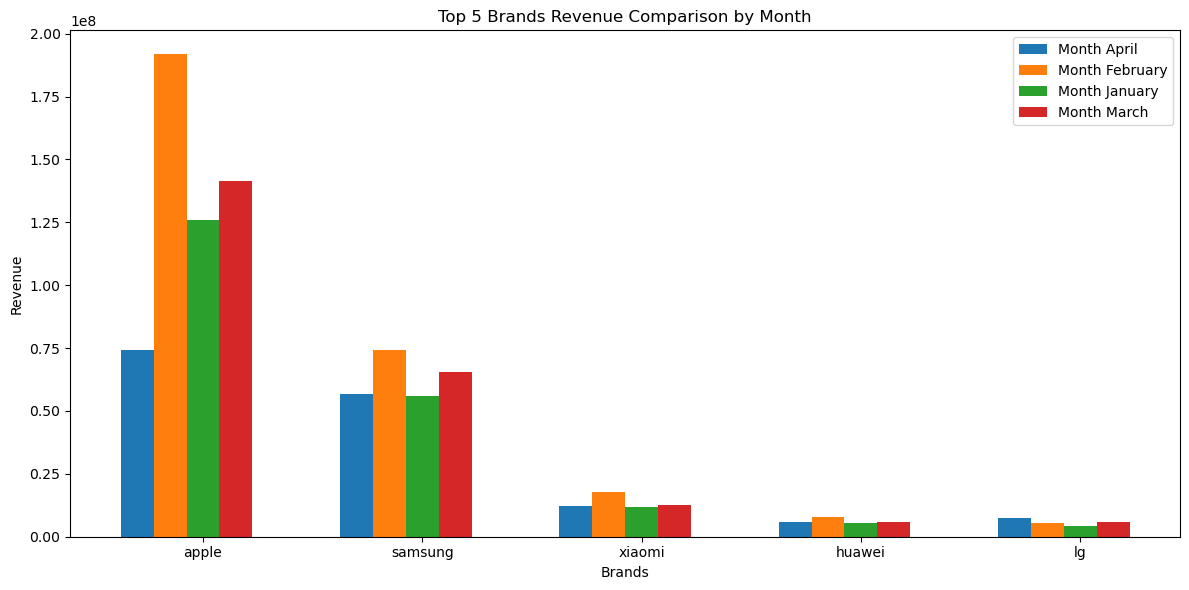

In [28]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.window import Window

# Window specification to partition by month and rank brands based on total_revenue
window_spec = Window.partitionBy('month').orderBy(col('total_revenue').desc())
average_revenue = grouped_data.groupBy('brand').agg(avg('total_revenue').alias('average_revenue'))

# Add a rank to each brand within each month based on total revenue
result_df_with_rank = grouped_data.withColumn('rank', row_number().over(window_spec))

# Filter the top 5 brands with the highest revenue for each month
top_5_brands_per_month = result_df_with_rank.join(average_revenue, on='brand', how='left')

# Get main_categories sorted by average revenue in descending order
# Collecting data to be used for plotting
sorted_brand = average_revenue.orderBy(col('average_revenue').desc()).limit(5).select('brand').rdd.flatMap(lambda x: x).collect()
months = sorted(top_5_brands_per_month.select('month').distinct().rdd.flatMap(lambda x: x).collect())

# Prepare data for plotting
data = {
    month: top_5_brands_per_month.filter(col('month') == month).select('brand', 'total_revenue').rdd.collectAsMap()
    for month in months
}

# Plotting bar plots for top 5 brands' revenue comparison across months
plt.figure(figsize=(12, 6))
bar_width = 0.15
for i, month in enumerate(months):
    revenues = [data[month].get(brand, 0) for brand in sorted_brand]
    plt.bar([x + i * bar_width for x in range(len(sorted_brand))], revenues, width=bar_width, label=f"Month {month}")

plt.xlabel('Brands')
plt.ylabel('Revenue')
plt.title('Top 5 Brands Revenue Comparison by Month')
plt.xticks([x + bar_width * len(months) / 2 for x in range(len(sorted_brand))], sorted_brand)
plt.legend()
plt.tight_layout()
plt.show()



In [29]:
# Filtering out rows with NaN in the 'main_category' column
grouped_data_category = combined_df_extracted.filter(col('main_category').isNotNull())

# Filtering rows where 'event_type' is 'purchase' and grouping by 'month', 'brand' to calculate 'revenue' and 'purchased_product'
grouped_data_category = grouped_data_category.filter(col('event_type') == 'purchase') \
    .groupBy('month', 'main_category') \
    .agg(sum('price').alias('total_revenue'), count('event_type').alias('n_purchased_product'))

grouped_data_category = grouped_data_category.withColumn('month', 
    when(col('month') == 1, 'January')
    .when(col('month') == 2, 'February')
    .when(col('month') == 3, 'March')
    .when(col('month') == 4, 'April')
    .otherwise(col('month')))

# Sort the resulting DataFrame by 'total_revenue' in descending order
grouped_data_category = grouped_data_category.orderBy(col('total_revenue').desc())

# Show the resulting sorted DataFrame
grouped_data_category.show()

+--------+-------------+--------------------+-------------------+
|   month|main_category|       total_revenue|n_purchased_product|
+--------+-------------+--------------------+-------------------+
|February| construction|2.6972798557000065E8|             617290|
|   March| construction|2.0619133444999826E8|             470373|
| January| construction|1.7606172534999973E8|             420131|
|   April| construction| 1.366515239299982E8|             395513|
|   April|   appliances| 4.275452728999993E7|             178564|
|   March|   appliances| 3.971439610999987E7|             142468|
|February|   appliances| 3.729254854000001E7|             143396|
| January|   appliances|3.4519439849999756E7|             114786|
|   March|  electronics|3.0391852160000198E7|              89001|
|February|  electronics| 2.802213858999994E7|              94561|
|   April|  electronics|2.7770856059999947E7|              84494|
| January|  electronics|1.7871134359999955E7|              64015|
|February|

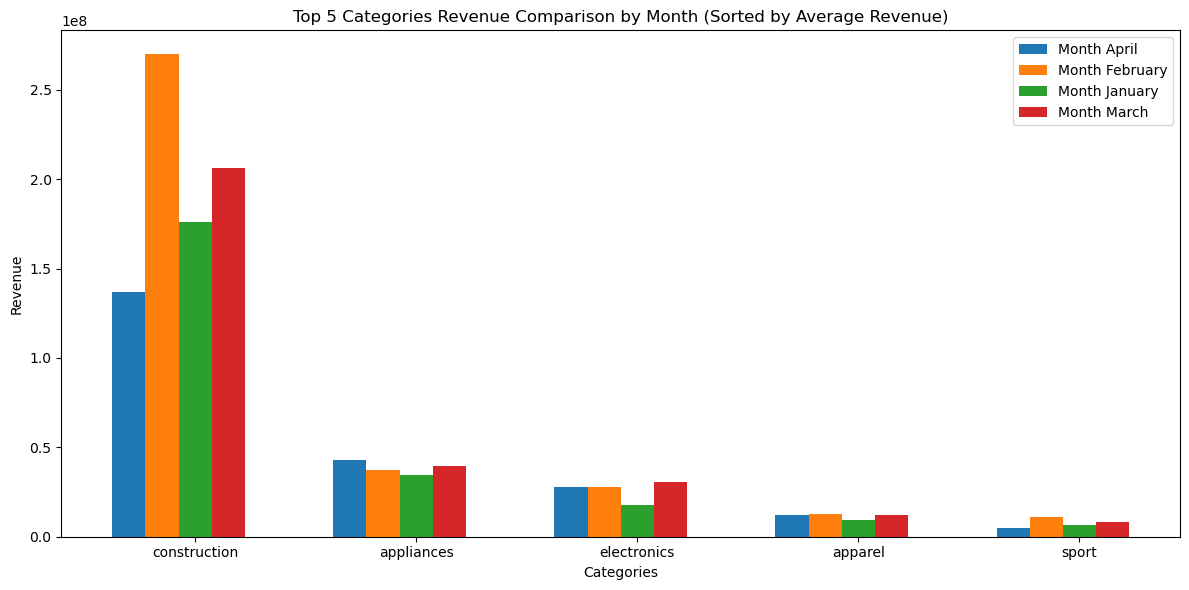

In [30]:
# Calculating the average revenue for each main category
average_revenue = grouped_data_category.groupBy('main_category').agg(avg('total_revenue').alias('average_revenue'))

# Adding a rank to each main category within each month based on total revenue
window_spec = Window.partitionBy('month').orderBy(col('total_revenue').desc())
result_df_with_rank = grouped_data_category.withColumn('rank', row_number().over(window_spec))

# Joining the ranked DataFrame with average revenue data
top_5_main_categories_per_month = result_df_with_rank.join(average_revenue, on='main_category', how='left')

# Getting the top 5 main categories sorted by average revenue in descending order
sorted_main_categories = average_revenue.orderBy(col('average_revenue').desc()).limit(5).select('main_category').rdd.flatMap(lambda x: x).collect()

# Collecting data for plotting
months = sorted(top_5_main_categories_per_month.select('month').distinct().rdd.flatMap(lambda x: x).collect())

# Prepare data for plotting for top 5 main categories
data = {
    month: top_5_main_categories_per_month.filter((col('month') == month) & (col('main_category').isin(sorted_main_categories)))
                                          .select('main_category', 'total_revenue').rdd.collectAsMap()
    for month in months
}

# Plotting bar plots for top 5 main_categories' revenue comparison across months
plt.figure(figsize=(12, 6))
bar_width = 0.15
for i, month in enumerate(months):
    revenues = [data[month].get(main_category, 0) for main_category in sorted_main_categories]
    plt.bar([x + i * bar_width for x in range(len(sorted_main_categories))], revenues, width=bar_width, label=f"Month {month}")

plt.xlabel('Categories')
plt.ylabel('Revenue')
plt.title('Top 5 Categories Revenue Comparison by Month (Sorted by Average Revenue)')
plt.xticks([x + bar_width * len(months) / 2 for x in range(len(sorted_main_categories))], sorted_main_categories)
plt.legend()
plt.tight_layout()
plt.show()


In [46]:
#PLOTTING WITH DATETIME AS X-AXIS
# !pip install plotly

In [47]:
from pyspark.sql.functions import weekofyear
import plotly.express as px

# Aggregate data by week and main_category, and count purchases
weekly_purchases = combined_df \
    .filter(combined_df['event_type'] == 'purchase') \
    .groupBy(weekofyear('event_time').alias('week'), 'main_category') \
    .count() \
    .orderBy('week')

# Collect data for plotting
plot_data = weekly_purchases.collect()

# Plotting with Plotly
fig = px.line(x=[row['week'] for row in plot_data],
              y=[row['count'] for row in plot_data],
              color=[row['main_category'] for row in plot_data],
              labels={'x': 'Week', 'y': 'Number of Purchases'},
              title='Number of Purchases Over Time by Main Category (Weekly)')
fig.show()

In [42]:
# First, identify the top brands
top_brands = combined_df.filter(combined_df['event_type'] == 'purchase') \
    .groupBy('brand').count().orderBy('count', ascending=False) \
    .limit(10).select('brand').rdd.flatMap(lambda x: x).collect()

# Aggregate weekly data for top brands
weekly_brand_purchases = combined_df \
    .filter((combined_df['event_type'] == 'purchase') & (combined_df['brand'].isin(top_brands))) \
    .groupBy(weekofyear('event_time').alias('week'), 'brand') \
    .count() \
    .orderBy('week')

# Collect data for plotting
plot_data = weekly_brand_purchases.collect()

# Plotting with Plotly
fig = px.line(x=[row['week'] for row in plot_data],
              y=[row['count'] for row in plot_data],
              color=[row['brand'] for row in plot_data],
              labels={'x': 'Week', 'y': 'Number of Purchases'},
              title='Number of Purchases Over Time by Brand (Weekly)')
fig.show()


In [43]:
from pyspark.sql.functions import dayofweek

# Aggregate data by day of the week and main_category, and count purchases
daily_purchases = combined_df \
    .filter(combined_df['event_type'] == 'purchase') \
    .groupBy(dayofweek('event_time').alias('weekday'), 'main_category') \
    .count() \
    .orderBy('weekday')

# Collect data for plotting
plot_data = daily_purchases.collect()

# Plotting with Plotly
fig = px.line(x=[row['weekday'] for row in plot_data],
              y=[row['count'] for row in plot_data],
              color=[row['main_category'] for row in plot_data],
              labels={'x': 'Day of the Week', 'y': 'Number of Purchases'},
              title='Number of Purchases Over Time by Main Category (Daily)')
fig.show()

# SAVE THE DATA TO CSV TO BE LOADED IN THE BUCKET FOR THE NEXT STEP

In [ ]:
# # Assuming combined_df is your PySpark DataFrame

# # Specify the output path where you want to save the CSV file
# output_path = "cleaned_ecommerce.csv"

# # Write the DataFrame to a CSV file
# combined_df.write.csv(output_path, header=True, mode="overwrite")


In [ ]:
minio_bucket_new = 'deltaecommerce'

# Convert combined_df (assuming it's a DataFrame) to Delta format and save it to MinIO
# Create a Delta table from the DataFrame and overwrite if it exists
combined_df.write.format("delta").mode("overwrite").save(f"s3a://{minio_bucket_new}/combined_df")
